# Bike problem
## Bike defination 
1. profit predection 

In [1]:
import numpy as np 
import matplotlib as plt
import seaborn as sns 
import pandas as pd
sns.set(rc={'figure.figsize':[7,7]},font_scale = 1.2)

In [2]:
df = pd.read_csv('bikes.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,1/1/2011 0:00,1,0,0,1,9.84,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,75,0.0,0,1,1


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            10886 non-null  object 
 1   season              10886 non-null  int64  
 2   holiday             10886 non-null  int64  
 3   workingday          10886 non-null  int64  
 4   weather             10886 non-null  int64  
 5   temp                10886 non-null  float64
 6   humidity            10886 non-null  int64  
 7   windspeed           10886 non-null  float64
 8   casual              10886 non-null  int64  
 9   registered          10886 non-null  int64  
 10  rented_bikes_count  10886 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 935.6+ KB


In [4]:
#convert object to datetime
df['datetime'] = df['datetime'].apply(pd.to_datetime)

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,1


In [6]:
def calculate_profit(x):
    casual_customers = x['casual']
    registered_customers = x['registered']
    registered_price_per_hour = 5
    casual_price_per_hour  = 20 
    taxes = 0.14
    maintance_per_hour = 1500 /(365*24)
    profit_cash = casual_customers * casual_price_per_hour + registered_customers * registered_price_per_hour
    profit_with_taxes = profit_cash - (taxes * profit_cash)
    total_profit = profit_with_taxes - maintance_per_hour
    
    return total_profit
    
df['profit'] = df[['casual','registered']].apply(calculate_profit,axis = 1)

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16,107.328767
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40,275.028767
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,27,32,201.928767
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,10,13,94.428767
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,1,4.128767


C:\Users\LEN0VO_2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rented_bikes_count'>

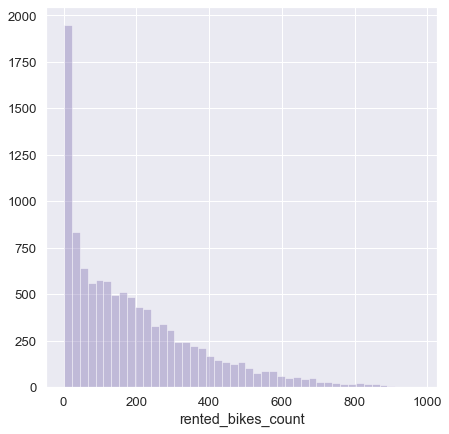

In [8]:
sns.distplot(df['rented_bikes_count'],kde = False , color = 'm')

In [9]:
df[df['rented_bikes_count'] == df['rented_bikes_count'].max()]

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit
9345,2012-09-12 18:00:00,3,0,1,1,27.06,44,16.9979,91,886,977,5374.828767


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10886 non-null  int64         
 2   holiday             10886 non-null  int64         
 3   workingday          10886 non-null  int64         
 4   weather             10886 non-null  int64         
 5   temp                10886 non-null  float64       
 6   humidity            10886 non-null  int64         
 7   windspeed           10886 non-null  float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  profit              10886 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [11]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

In [12]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,year,month,day_of_week,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16,107.328767,2011,1,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40,275.028767,2011,1,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,27,32,201.928767,2011,1,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,10,13,94.428767,2011,1,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,1,4.128767,2011,1,Saturday,4


<AxesSubplot:>

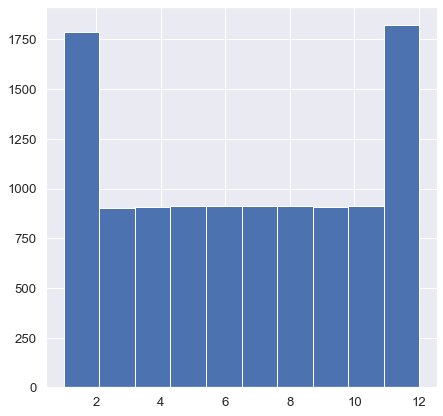

In [13]:
df['month'].hist()

In [14]:
df.groupby('day_of_week').describe()[['rented_bikes_count','profit']].transpose()

day_of_week                    Friday       Monday     Saturday       Sunday  \
rented_bikes_count count  1529.000000  1551.000000  1584.000000  1579.000000   
                   mean    197.844343   190.390716   196.665404   180.839772   
                   std     172.518208   180.943376   180.917795   167.022145   
                   min       1.000000     1.000000     1.000000     1.000000   
                   25%      52.000000    39.000000    45.000000    43.000000   
                   50%     167.000000   146.000000   141.500000   119.000000   
                   75%     290.000000   277.500000   309.500000   298.000000   
                   max     900.000000   968.000000   783.000000   757.000000   
profit             count  1529.000000  1551.000000  1584.000000  1579.000000   
                   mean   1250.484751  1203.496079  1666.252504  1513.401535   
                   std    1110.019552  1129.727600  1772.625088  1571.404307   
                   min       4.128767     4.128767     4.128767     4.128767   
                   25%     300.828767   249.228767   283.628767   287.928767   
                   50%    1036.128767   954.428767   956.578767   812.528767   
                   75%    1891.828767  1827.328767  2614.228767  2429.328767   
                   max    5908.028767  5594.128767  7881.728767  7034.628767   

day_of_week                  Thursday      Tuesday    Wednesday  
rented_bikes_count count  1553.000000  1539.000000  1551.000000  
                   mean    197.296201   189.723847   188.411348  
                   std     187.606619   186.719673   190.942004  
                   min       1.000000     1.000000     1.000000  
                   25%      44.000000    36.000000    38.000000  
                   50%     155.000000   146.000000   136.000000  
                   75%     280.000000   274.000000   270.500000  
                   max     901.000000   970.000000   977.000000  
profit             count  1553.000000  1539.000000  1551.000000  
                   mean   1157.893803  1112.073082  1100.526188  
                   std    1086.029849  1065.481400  1111.243780  
                   min       4.128767     4.128767     4.128767  
                   25%     236.328767   210.528767   210.528767  
                   50%     911.428767   834.028767   791.028767  
                   75%    1741.328767  1704.778767  1657.478767  
                   max    5533.928767  6338.028767  5447.928767

In [15]:
df.groupby('season').describe()['profit']

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,699.920316,853.820568,4.128767,128.828767,438.428767,920.028767,7679.628767
2,2733.0,1537.472894,1453.088262,4.128767,322.328767,1216.728767,2244.428767,7795.728767
3,2733.0,1681.463893,1427.630038,4.128767,442.728767,1414.528767,2463.728767,7881.728767
4,2734.0,1224.171196,1185.870080,4.128767,292.228767,937.228767,1754.228767,7864.528767


In [16]:
df.groupby('weather').describe()['rented_bikes_count'].transpose()

weather,1,2,3,4
count,7192.000000,2834.000000,859.000000,1.0
mean,205.236791,178.955540,118.846333,164.0
std,187.959566,168.366413,138.581297,NaN
min,1.000000,1.000000,1.000000,164.0
25%,48.000000,41.000000,23.000000,164.0
50%,161.000000,134.000000,71.000000,164.0
75%,305.000000,264.000000,161.000000,164.0
max,977.000000,890.000000,891.000000,164.0


In [17]:
def rush_hour(hour):
    if hour in [7,8,9,15,16,17]:
        return 1
    else:
        return 0

df['rush_hour'] = df['hour'].apply(rush_hour)

In [18]:
df.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,year,month,day_of_week,hour,rush_hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16,107.328767,2011,1,Saturday,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40,275.028767,2011,1,Saturday,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,27,32,201.928767,2011,1,Saturday,2,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,10,13,94.428767,2011,1,Saturday,3,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,1,4.128767,2011,1,Saturday,4,0


In [19]:
df.groupby('rush_hour').describe()['profit'].transpose()

rush_hour,0,1
count,8153.000000,2733.000000
mean,1069.674358,1940.420498
std,1217.987206,1356.260623
min,4.128767,4.128767
25%,158.928767,937.228767
50%,644.828767,1689.728767
75%,1547.828767,2622.828767
max,7864.528767,7881.728767


In [20]:
df.corr()[['profit','rented_bikes_count']].loc[['casual','registered']]

,profit,rented_bikes_count
casual,0.902713,0.690414
registered,0.822156,0.970948


### Visulaization 

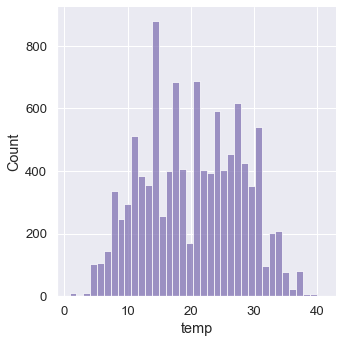

In [21]:
sns.displot(df['temp'],kde = False ,color = 'm')

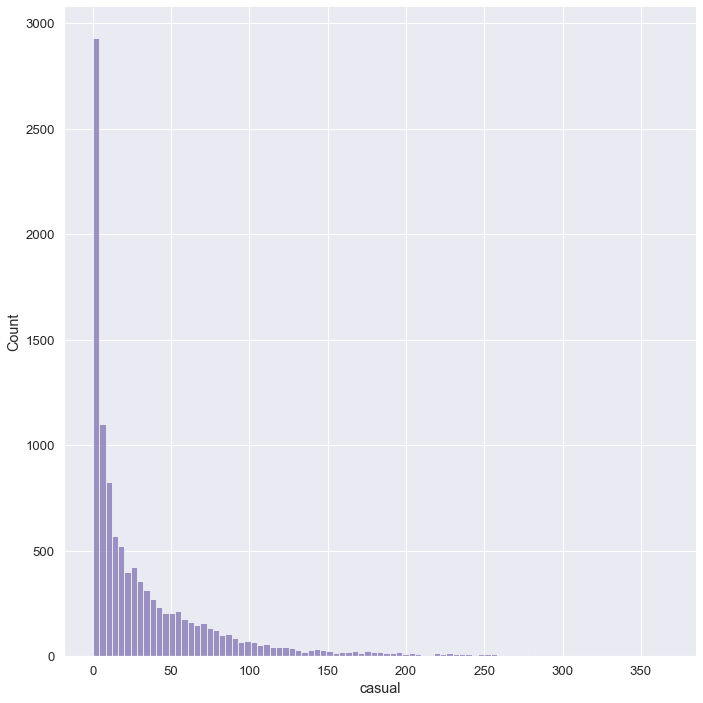

In [22]:
sns.displot(df['casual'],kde = False ,color = 'm',height =10)

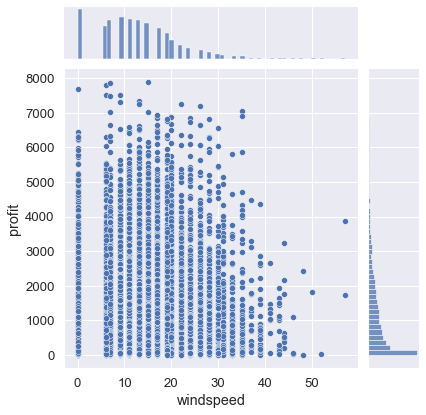

In [23]:
sns.jointplot(x='windspeed',y='profit',data=df,color ='b')

<AxesSubplot:xlabel='season', ylabel='count'>

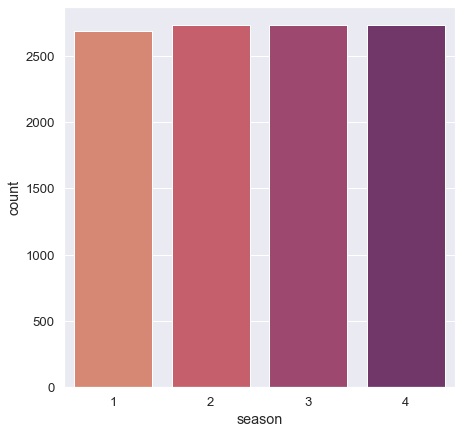

In [24]:
sns.countplot(x='season',data = df,palette ='flare')

<AxesSubplot:xlabel='holiday', ylabel='count'>

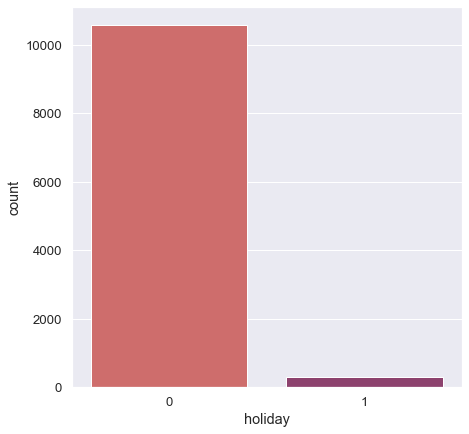

In [25]:
sns.countplot(x='holiday',data = df,palette ='flare')

<AxesSubplot:xlabel='weather', ylabel='count'>

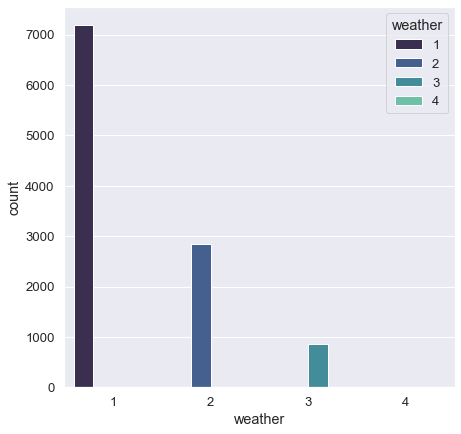

In [26]:
sns.countplot(x='weather',data = df,palette ='mako',hue='weather')

<AxesSubplot:xlabel='year', ylabel='count'>

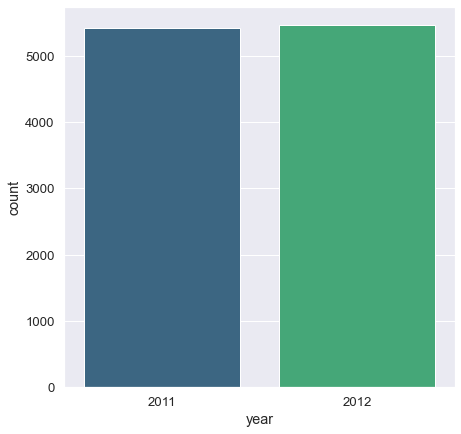

In [27]:
sns.countplot(x='year',data = df,palette ='viridis')

<AxesSubplot:xlabel='count', ylabel='month'>

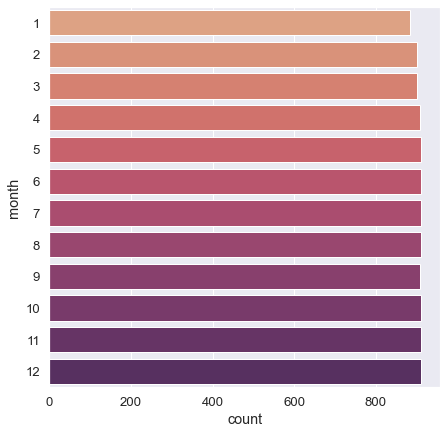

In [28]:
sns.countplot(y='month',data = df,palette ='flare')

<AxesSubplot:xlabel='count', ylabel='day_of_week'>

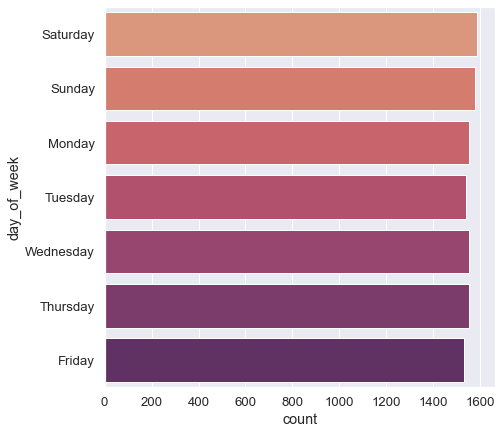

In [29]:
sns.countplot(y='day_of_week',data = df,palette ='flare')

<AxesSubplot:xlabel='season', ylabel='profit'>

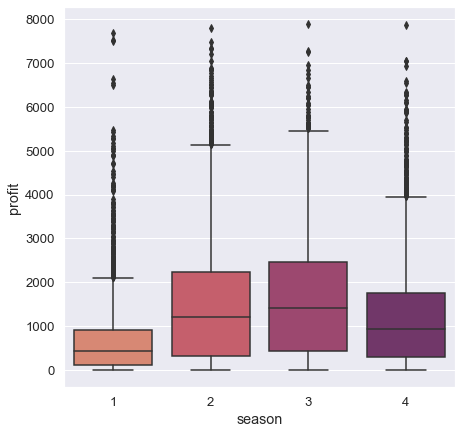

In [30]:
sns.boxplot(x ='season',y='profit',data = df ,palette='flare')

<AxesSubplot:xlabel='hour', ylabel='profit'>

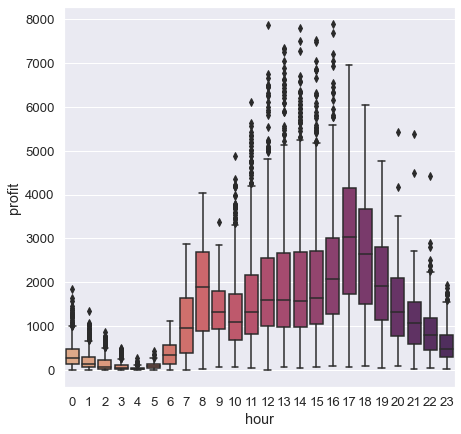

In [31]:
sns.boxplot(x ='hour',y='profit',data = df ,palette='flare')

### Data pre processing 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10886 non-null  int64         
 2   holiday             10886 non-null  int64         
 3   workingday          10886 non-null  int64         
 4   weather             10886 non-null  int64         
 5   temp                10886 non-null  float64       
 6   humidity            10886 non-null  int64         
 7   windspeed           10886 non-null  float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  profit              10886 non-null  float64       
 12  year                10886 non-null  int64         
 13  month               10886 non-null  int64     

In [33]:
for col in ['temp','humidity','windspeed','casual','registered','rented_bikes_count','profit']:
    df[col] = pd.to_numeric(df[col],errors = 'coerce' )

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10886 non-null  int64         
 2   holiday             10886 non-null  int64         
 3   workingday          10886 non-null  int64         
 4   weather             10886 non-null  int64         
 5   temp                10886 non-null  float64       
 6   humidity            10886 non-null  int64         
 7   windspeed           10886 non-null  float64       
 8   casual              10886 non-null  int64         
 9   registered          10886 non-null  int64         
 10  rented_bikes_count  10886 non-null  int64         
 11  profit              10886 non-null  float64       
 12  year                10886 non-null  int64         
 13  month               10886 non-null  int64     

In [35]:
df.isna().sum()

datetime              0
season                0
holiday               0
workingday            0
weather               0
temp                  0
humidity              0
windspeed             0
casual                0
registered            0
rented_bikes_count    0
profit                0
year                  0
month                 0
day_of_week           0
hour                  0
rush_hour             0
dtype: int64

In [36]:
df

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,year,month,day_of_week,hour,rush_hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,13,16,107.328767,2011,1,Saturday,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,32,40,275.028767,2011,1,Saturday,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,27,32,201.928767,2011,1,Saturday,2,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,10,13,94.428767,2011,1,Saturday,3,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,0,1,1,4.128767,2011,1,Saturday,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,329,336,1534.928767,2012,12,Wednesday,19,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,231,241,1165.128767,2012,12,Wednesday,20,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,164,168,773.828767,2012,12,Wednesday,21,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,12,117,129,709.328767,2012,12,Wednesday,22,0


In [37]:
df = df [['season','holiday','workingday','weather','temp','humidity','windspeed','casual','registered','rented_bikes_count',
         'profit','year','month','day_of_week','hour','rush_hour']]
df

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,profit,year,month,day_of_week,hour,rush_hour
0,1,0,0,1,9.84,81,0.0000,3,13,16,107.328767,2011,1,Saturday,0,0
1,1,0,0,1,9.02,80,0.0000,8,32,40,275.028767,2011,1,Saturday,1,0
2,1,0,0,1,9.02,80,0.0000,5,27,32,201.928767,2011,1,Saturday,2,0
3,1,0,0,1,9.84,75,0.0000,3,10,13,94.428767,2011,1,Saturday,3,0
4,1,0,0,1,9.84,75,0.0000,0,1,1,4.128767,2011,1,Saturday,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,7,329,336,1534.928767,2012,12,Wednesday,19,0
10882,4,0,1,1,14.76,57,15.0013,10,231,241,1165.128767,2012,12,Wednesday,20,0
10883,4,0,1,1,13.94,61,15.0013,4,164,168,773.828767,2012,12,Wednesday,21,0
10884,4,0,1,1,13.94,61,6.0032,12,117,129,709.328767,2012,12,Wednesday,22,0


In [38]:
# convert the categorical variable 
df = pd.get_dummies(df,columns=['day_of_week'],drop_first=True)
df

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,rented_bikes_count,...,year,month,hour,rush_hour,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,1,0,0,1,9.84,81,0.0000,3,13,16,...,2011,1,0,0,0,1,0,0,0,0
1,1,0,0,1,9.02,80,0.0000,8,32,40,...,2011,1,1,0,0,1,0,0,0,0
2,1,0,0,1,9.02,80,0.0000,5,27,32,...,2011,1,2,0,0,1,0,0,0,0
3,1,0,0,1,9.84,75,0.0000,3,10,13,...,2011,1,3,0,0,1,0,0,0,0
4,1,0,0,1,9.84,75,0.0000,0,1,1,...,2011,1,4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,7,329,336,...,2012,12,19,0,0,0,0,0,0,1
10882,4,0,1,1,14.76,57,15.0013,10,231,241,...,2012,12,20,0,0,0,0,0,0,1
10883,4,0,1,1,13.94,61,15.0013,4,164,168,...,2012,12,21,0,0,0,0,0,0,1
10884,4,0,1,1,13.94,61,6.0032,12,117,129,...,2012,12,22,0,0,0,0,0,0,1


In [39]:
#split data to train and test
x = df.drop('profit', axis =1)
y = df['profit']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [43]:
x_train.shape

(8708, 20)

In [44]:
x_test.shape

(2178, 20)

In [48]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
x_train

array([[ 0.43860523, -0.17050261,  0.68643606, ..., -0.40383496,
        -0.39998002, -0.40709899],
       [-0.45544307, -0.17050261, -1.45679993, ..., -0.40383496,
        -0.39998002, -0.40709899],
       [ 1.33265353, -0.17050261,  0.68643606, ...,  2.4762591 ,
        -0.39998002, -0.40709899],
       ...,
       [ 0.43860523, -0.17050261,  0.68643606, ..., -0.40383496,
        -0.39998002, -0.40709899],
       [ 1.33265353, -0.17050261, -1.45679993, ..., -0.40383496,
        -0.39998002, -0.40709899],
       [ 0.43860523, -0.17050261, -1.45679993, ..., -0.40383496,
        -0.39998002, -0.40709899]])

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error 

In [57]:
models = {
    "LR" : LinearRegression(),
    "KNN" : KNeighborsRegressor(),
    "SVR" : SVR(),
    "DT" : DecisionTreeRegressor(),
    "RF" : RandomForestRegressor(),
    "XG" : XGBRegressor()
}

In [59]:
for name , model in models.items():
    print(f'using model:{name}')
    model.fit(x_train,y_train)
    print(f'Training score:{model.score(x_train,y_train)}')
    print(f'Test score:{model.score(x_test,y_test)}')
    y_pred = model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}')
    print('--------------------------------------------')

using model:LR
Training score:1.0
Test score:1.0
RMSE: 1.0495481583104458e-12
--------------------------------------------
using model:KNN
Training score:0.9752350903504323
Test score:0.964224447470319
RMSE: 248.6913900061223
--------------------------------------------
using model:SVR
Training score:0.2697651539556437
Test score:0.25347885104692935
RMSE: 1136.026945872017
--------------------------------------------
using model:DT
Training score:1.0
Test score:0.9986592546422469
RMSE: 48.14383985398478
--------------------------------------------
using model:RF
Training score:0.9999527880118945
Test score:0.9997127739028759
RMSE: 22.283300824763966
--------------------------------------------
using model:XG
Training score:0.999934740235517
Test score:0.9995338853730477
RMSE: 28.38663676541691
--------------------------------------------


In [62]:
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [64]:
y_pred = model.predict(x_test)
y_pred

array([1714.2285 ,  110.58015, 1336.1388 , ..., 2982.4739 ,  318.81393,
       3192.504  ], dtype=float32)

In [65]:
y_test

843      1762.828767
648       111.628767
10667    1324.228767
8666     2124.028767
9109     1565.028767
            ...     
4116      713.628767
1176     2300.328767
9154     3018.428767
284       309.428767
8330     3220.528767
Name: profit, Length: 2178, dtype: float64

In [66]:
np.sqrt(mean_squared_error(y_test,y_pred))

28.38663676541691

In [67]:
import joblib

In [69]:
joblib.dump(model,'model.h5')

['model.h5']

In [70]:
joblib.dump(model,'scaler.h5')

['scaler.h5']

In [71]:
x.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'casual', 'registered', 'rented_bikes_count', 'year',
       'month', 'hour', 'rush_hour', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')

In [73]:
test_data = [1,0,0,1,25,16,14,5,10,40,2012,5,2,0,1,0,0,0,0,0]

In [74]:
test_data = scaler.transform([test_data])

In [75]:
model.predict(test_data)

array([239.08862], dtype=float32)